# **Taller 3- Ciencia de datos aplicada**
## **Modelos de clasificación y API REST**

### **Integrantes**
*   Yachay Tolosa Bello – 202315750
*   Kevin Infante Hernández – 201117324​
*   John Vicente Moreno Triviño – 202210162

### **Objetivo**
*   xxxx.

In [1]:
!pip install --upgrade geopandas holidays pandas scikit-learn numpy pycaret xgboost seaborn shap ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 86.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 109.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 69.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [1]:
from joblib import dump

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ks_2samp
from sklearn.feature_selection import chi2

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer, LabelEncoder
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc
from sklearn.base import BaseEstimator, TransformerMixin

import shap

import ydata_profiling

# Configuración de pandas para expandir el número de filas y columnas por defecto a mostrar
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

# Cambiar el formato en el que se muestran los valores float
pd.set_option("display.float_format", lambda x: "%.5f" % x)

from pycaret.classification import ClassificationExperiment, setup
from pycaret.classification import ClassificationExperiment

In [2]:
churn_hist_df = pd.read_json("/content/drive/MyDrive/churn_historic.json", orient='columns')
churn_fut_df = pd.read_json("/content/drive/MyDrive/churn_future.json", orient='columns')

In [3]:
print(churn_hist_df.shape)
print(churn_fut_df.shape)

(6000, 21)
(1000, 21)


In [4]:
churn_hist_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
churn_fut_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
churn_hist_df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85000,29.85000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95000,1889.50000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85000,108.15000,Yes
3,5386-THSLQ,Female,1,Yes,No,66,No,No phone service,DSL,No,Yes,Yes,No,Yes,No,One year,No,Bank transfer (automatic),45.55000,3027.25000,No
4,3192-NQECA,Male,0,Yes,No,68,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),110.00000,7611.85000,Yes
5,6180-YBIQI,Male,0,No,No,5,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,24.30000,100.20000,No
6,6728-DKUCO,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,Yes,One year,Yes,Electronic check,104.15000,7303.05000,No
7,9750-BOOHV,Female,0,No,No,32,No,No phone service,DSL,Yes,No,No,No,No,No,One year,No,Mailed check,30.15000,927.65000,No
8,8597-CWYHH,Male,0,No,No,43,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,One year,No,Mailed check,94.35000,3921.30000,No
9,2848-YXSMW,Male,0,Yes,Yes,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.40000,1363.25000,No


In [7]:
churn_fut_df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30000,1840.75000,No
1,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70000,151.65000,Yes
2,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65000,820.50000,Yes
3,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10000,1949.40000,No
4,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75000,301.90000,No
5,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80000,3046.05000,Yes
6,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15000,3487.95000,No
7,9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95000,587.45000,No
8,7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95000,326.80000,No
9,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35000,5681.10000,No


In [12]:
ydata_profiling.ProfileReport(churn_hist_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
features = ["gender", "SeniorCitizen", "Partner", "Dependents", "tenure",
            "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
            "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod",
            "MonthlyCharges"]

In [14]:
churn_hist_df['Churn'] = churn_hist_df['Churn'].replace({'Yes': 1, 'No': 0})
churn_fut_df['Churn'] = churn_fut_df['Churn'].replace({'Yes': 1, 'No': 0})

In [15]:
churn_df, test_df = train_test_split(churn_hist_df, test_size=0.2, random_state=42)

In [16]:
def transform_column(x):
    return pd.to_numeric(x, errors='coerce').fillna(0).astype(float)

text_transformer = FunctionTransformer(transform_column)

categorical_transformer = OneHotEncoder(sparse=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('category', categorical_transformer, ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
                                               'gender', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                                               'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                                               'StreamingMovies', 'Contract', 'PaymentMethod']),
        #('TotalCharges', text_transformer, ['TotalCharges']),
    ],
    remainder='passthrough'
)

In [17]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ("classifier",  RandomForestClassifier(random_state=10))
])

In [18]:
param_grid = {
    "classifier__n_estimators": [50, 100, 150],
    "classifier__max_depth" : [3, 4, 5, 6],
    "classifier__class_weight": ["balanced", None]
}

In [19]:
grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=["precision", "recall", "f1", "roc_auc"],
                    refit="f1", cv=5, return_train_score=True)

In [21]:
grid.fit(churn_df[features], churn_df["Churn"])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('category',
                                                                         OneHotEncoder(sparse=False),
                                                                         ['Partner',
                                                                          'Dependents',
                                                                          'PhoneService',
                                                                          'PaperlessBilling',
                                                                          'gender',
                                                                          'MultipleLines',
                                                                          'InternetService',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'StreamingTV',
                                                                          'StreamingMovies',
                                                                          'Contract',
                                                                          'PaymentMethod'])])),
                                       ('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier(random_state=10))]),
             param_grid={'classifier__class_weight': ['balanced', None],
                         'classifier__max_depth': [3, 4, 5, 6],
                         'classifier__n_estimators': [50, 100, 150]},
             refit='f1', return_train_score=True,
             scoring=['precision', 'recall', 'f1', 'roc_auc'])

In [22]:
grid.best_params_

{'classifier__class_weight': 'balanced',
 'classifier__max_depth': 6,
 'classifier__n_estimators': 50}

In [23]:
best_results_df = pd.DataFrame(grid.cv_results_).iloc[grid.best_index_].reset_index().rename(columns={"index": "result", grid.best_index_: "value"})
best_results_df = best_results_df.loc[best_results_df["result"].str.contains("split")]
[best_results_df["split"], best_results_df["dataset"], best_results_df["metric"]] = zip(*best_results_df["result"].str.split("_"))
best_results_df["dataset"].replace({"test": "validation"}, inplace=True)
del best_results_df["result"]

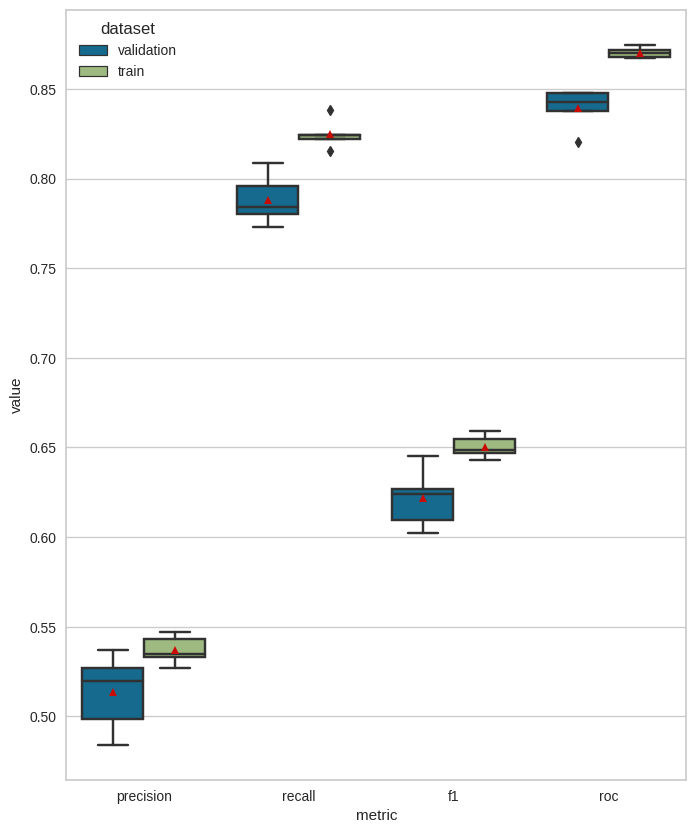

In [24]:
plt.figure(figsize=(8, 10))
sns.boxplot(data=best_results_df, y="value", x="metric", hue="dataset", showmeans=True)
plt.show()

In [25]:
train_val_preds = grid.best_estimator_.predict(churn_df[features])
test_preds = grid.best_estimator_.predict(test_df[features])

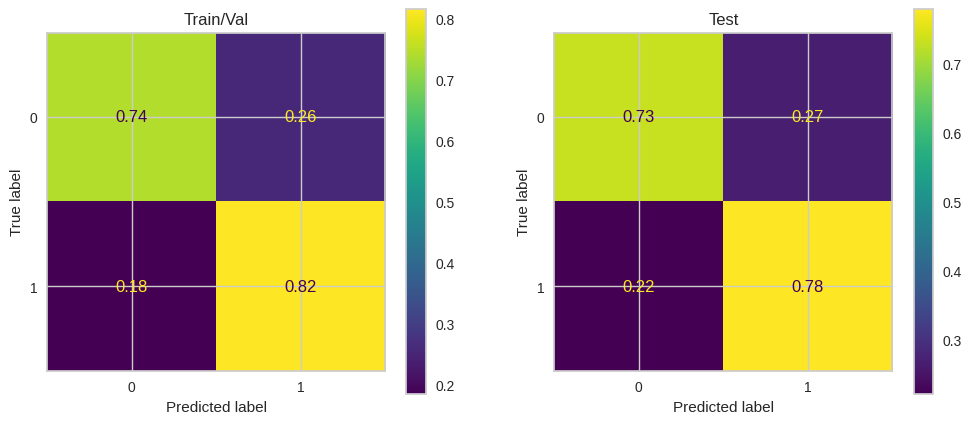

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

train_val_cm = confusion_matrix(churn_df["Churn"], train_val_preds, labels=grid.best_estimator_.classes_, normalize="true")
train_val_disp = ConfusionMatrixDisplay(confusion_matrix=train_val_cm, display_labels=grid.best_estimator_.classes_)
train_val_disp.plot(ax=axes[0])
axes[0].set_title("Train/Val")

test_cm = confusion_matrix(test_df["Churn"], test_preds, labels=grid.best_estimator_.classes_, normalize="true")
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=grid.best_estimator_.classes_)
test_disp.plot(ax=axes[1])
axes[1].set_title("Test")

plt.show()

Text(0.5, 1.0, 'Test')

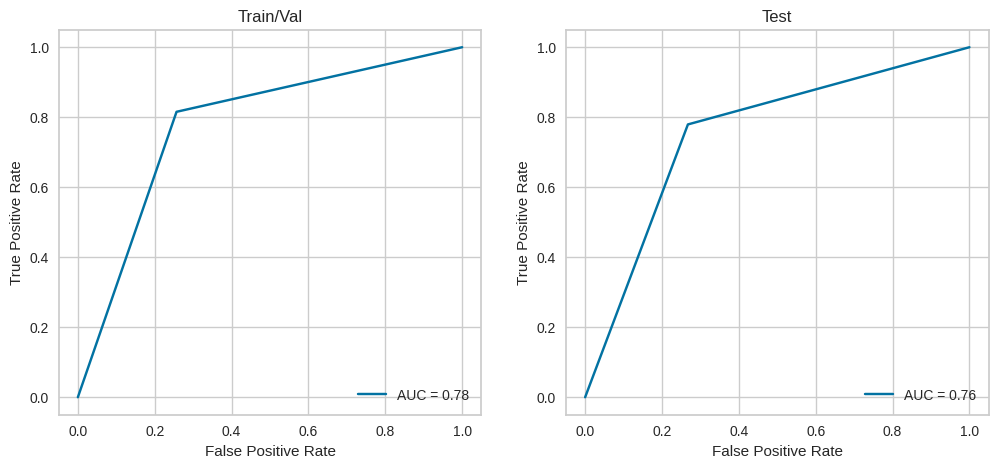

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

fpr, tpr, thresholds = roc_curve(churn_df["Churn"], train_val_preds)
area = auc(fpr, tpr)
train_val_disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=area)
train_val_disp.plot(ax=axes[0])
axes[0].set_title("Train/Val")

fpr, tpr, thresholds = roc_curve(test_df["Churn"], test_preds)
area = auc(fpr, tpr)
test_disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=area)
test_disp.plot(ax=axes[1])
axes[1].set_title("Test")

In [28]:
print("Precision:")
print("- Train/Val:", precision_score(churn_df["Churn"], train_val_preds))
print("- Test:", precision_score(test_df["Churn"], test_preds))
print("\nRecall:")
print("- Train/Val:", recall_score(churn_df["Churn"], train_val_preds))
print("- Test:", recall_score(test_df["Churn"], test_preds))
print("\nF1:")
print("- Train/Val:", f1_score(churn_df["Churn"], train_val_preds))
print("- Test:", f1_score(test_df["Churn"], test_preds))
print("\nROC AUC:")
print("- Train/Val:", roc_auc_score(churn_df["Churn"], train_val_preds))
print("- Test:", roc_auc_score(test_df["Churn"], test_preds))

Precision:
- Train/Val: 0.5284679089026915
- Test: 0.5353535353535354

Recall:
- Train/Val: 0.8154952076677316
- Test: 0.7794117647058824

F1:
- Train/Val: 0.6413316582914572
- Test: 0.6347305389221557

ROC AUC:
- Train/Val: 0.779365416686177
- Test: 0.755984952120383


In [30]:
test_probs = grid.best_estimator_.predict_proba(test_df[features])[:,1]
probs_true_df = pd.DataFrame(np.append(test_probs.reshape(-1, 1), test_df["Churn"].values.reshape(-1, 1), axis=1), columns=["probs", "true"])

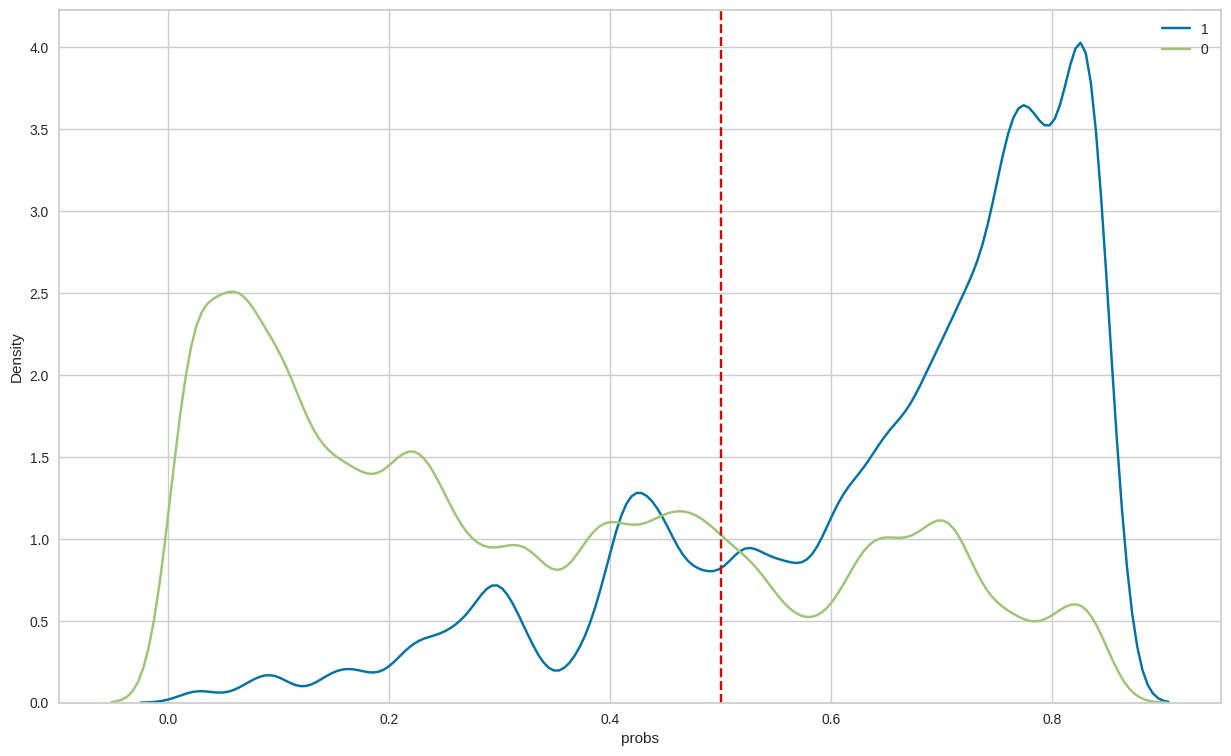

In [31]:
plt.figure(figsize=(15, 9))
sns.kdeplot(data=probs_true_df.loc[probs_true_df["true"] == 1], x="probs", bw_adjust=.3, label="1")
sns.kdeplot(data=probs_true_df.loc[probs_true_df["true"] == 0], x="probs", bw_adjust=.3, label="0")
plt.axvline(x=.5, color="r", linestyle="--")
plt.legend()
plt.show()

In [32]:
dump(grid.best_estimator_, "./churn-v1.0.joblib")

['./churn-v1.0.joblib']